# House Price Prediction Dataset

## Source
[Housing Prices Dataset - Kaggle](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)

##Objective:
Analyze house price determinants such as size, location, and amenities.
## Overview
This dataset contains information about housing prices and various features that influence them. It can be used for regression analysis, predictive modeling, and understanding the factors affecting real estate prices.

## Features
The dataset includes the following attributes:
- **Price**: The price of the house (target variable)
- **Area**: The total area of the house (in square feet)
- **Bedrooms**: Number of bedrooms in the house
- **Bathrooms**: Number of bathrooms
- **Stories**: Number of stories in the house
- **Mainroad**: Whether the house is near the main road (Yes/No)
- **Guestroom**: Availability of a guest room (Yes/No)
- **Basement**: Whether the house has a basement (Yes/No)
- **Hotwaterheating**: Availability of hot water heating (Yes/No)
- **Airconditioning**: Whether the house has air conditioning (Yes/No)
- **Parking**: Number of parking spaces available
- **Prefarea**: Whether the house is in a preferred area (Yes/No)
- **Furnishingstatus**: The furnishing status of the house (Furnished, Semi-Furnished, Unfurnished)





In [106]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
import warnings
warnings.filterwarnings('ignore')

In [107]:
#Reading the dataset
data = pd.read_csv("/content/Housing.csv")

In [108]:
#Printing the dataset
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [109]:
##finding the datatypes,colums and rows /information of the data provided
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


From the info we can see
1. The data has 545 rows and 13 columns
2. There are no null values but has few colomns with categorial data




In [110]:
#Print the duplicated rows
data[data.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


There are no duplicate rows in the dataset

In [111]:
#finding the mean,Standard deviation ,count, median for columns
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


1. From describing data we can see charges have a vast diff between 75%(upper quartile region) and max (outer extreme) so there might be outliers present and there are exponential values
2. So plotting histogram and boxplot for numerical colomns


In [112]:
# column for log transformation (numeric and positive)
cols_for_log = ['price']
for col in cols_for_log:
    # Add 1 to handle zero values before log transformation
    data[col] = np.log1p(data[col])

Using log transform to reduce the exponential values in Price colomn

In [113]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,16.403275,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,16.321037,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,16.321037,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,16.318175,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,16.250001,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [114]:
#finding the mean,Standard deviation ,count, median for columns
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,15.306987,5150.541284,2.965138,1.286239,1.805505,0.693578
std,0.372165,2170.141023,0.738064,0.502470,0.867492,0.861586
min,14.375127,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,15.048071,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,15.283385,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,15.562970,6360.000000,3.000000,2.000000,2.000000,1.000000
max,16.403275,16200.000000,6.000000,4.000000,4.000000,3.000000


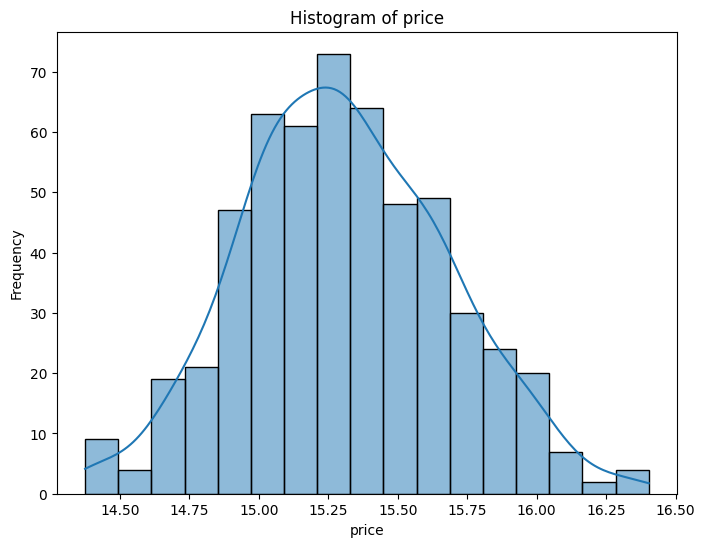

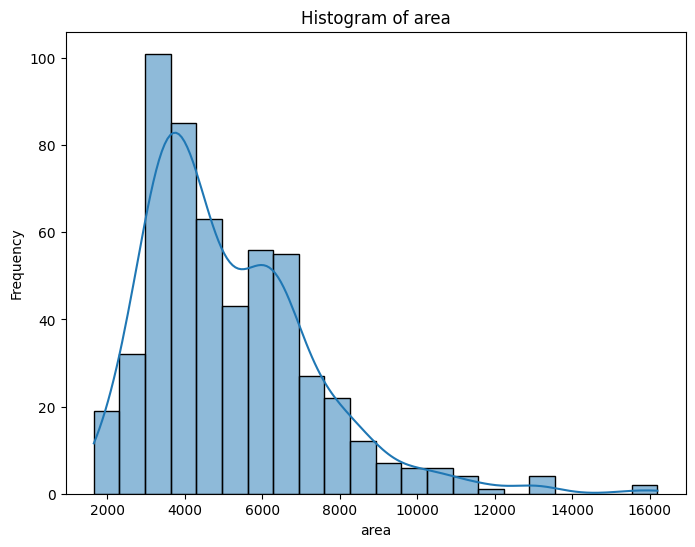

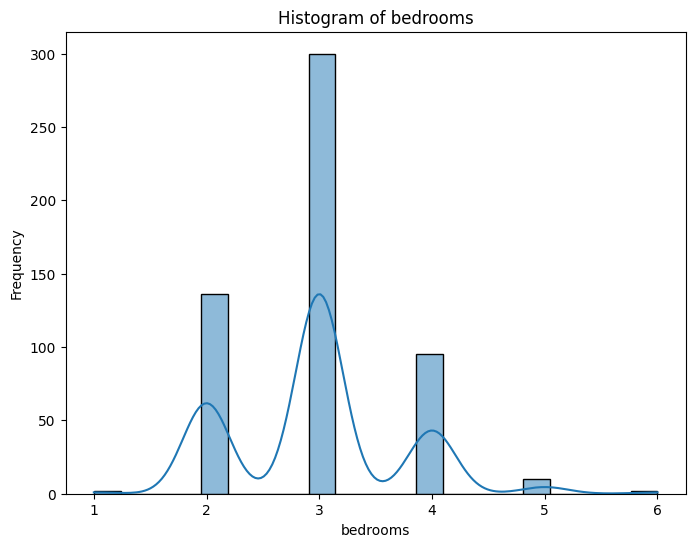

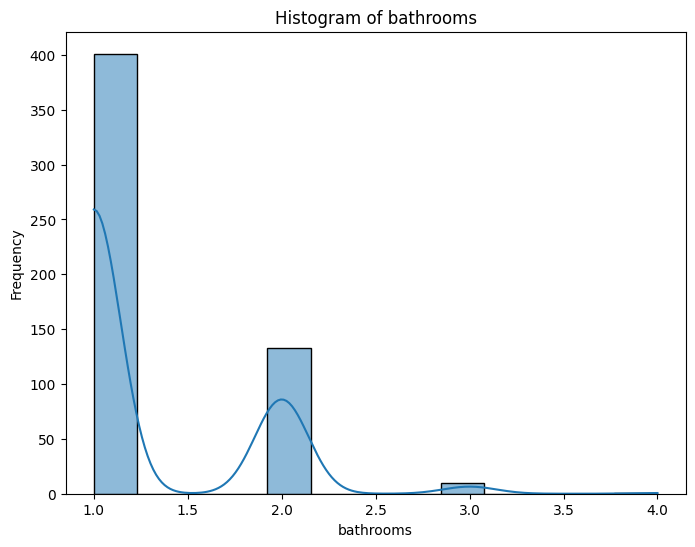

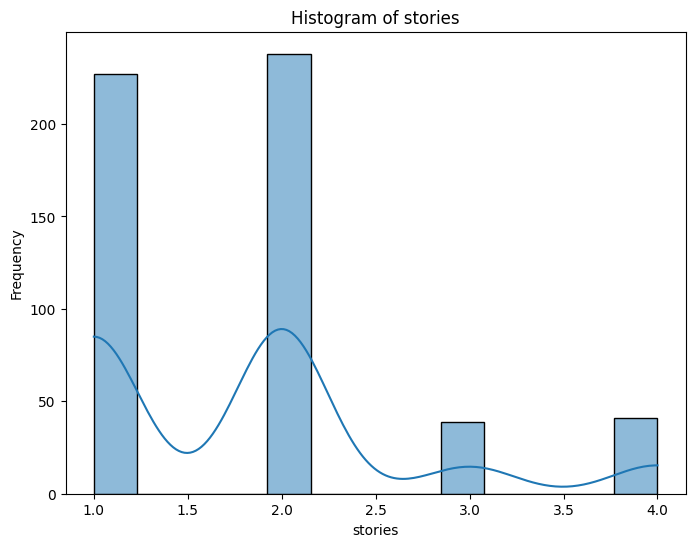

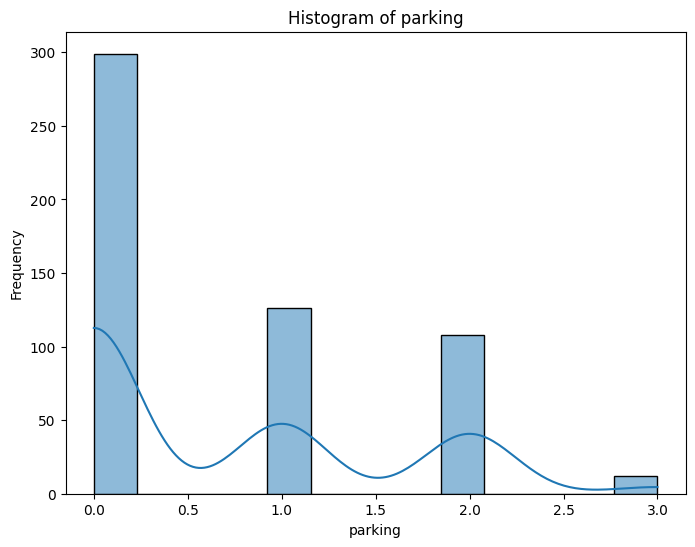

In [115]:
#Histogram for numerical colomns
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)  # Added KDE for better visualization
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

From histogram
1. Most observations have moderate housing prices and is slightly skewed to right indicating outliers
2. Area has highest frequency at ~3500 and ranges from 2000 to 16000 and most observations are concentrated around low and moderate area ,the graph is slightly skewed to right
3. Most observations has 3 bedrooms around 300, ranges from 1 to 6 and 2,3,4 bedrooms are most prefered according to data
4. one bathroom has the highest frequency around 400 , ranges from 1 to 4, houses with 2 bathroom has around ~150 observations and is slightly skewed to right
5. 2 Storied houses has the highest peak above ~200 and most houses with 1 and 2 stories are observed in the data, there is some skewness to right
6. Houses with no parking lot is seen more from the data ~300 , and second most observed is 1 and 2 parking spaces


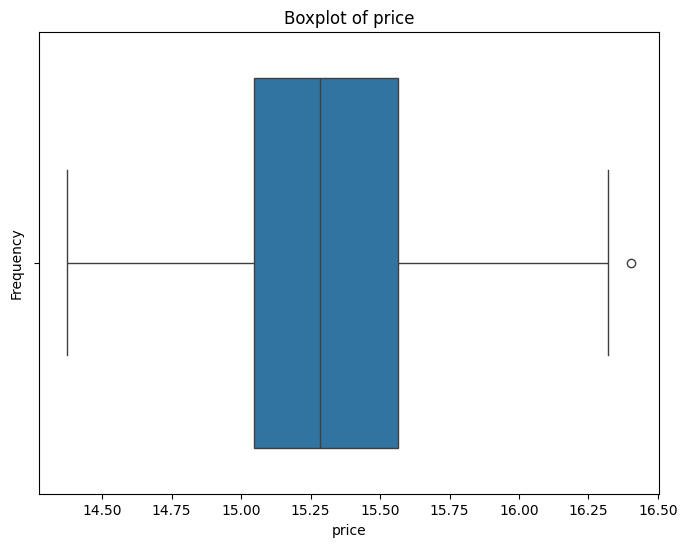

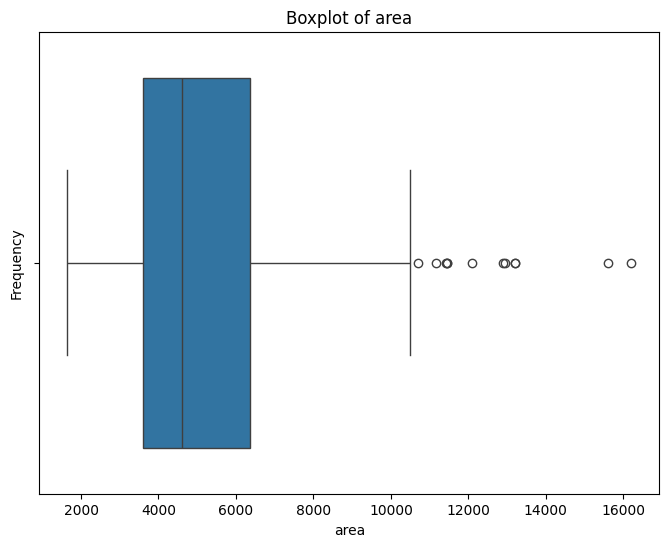

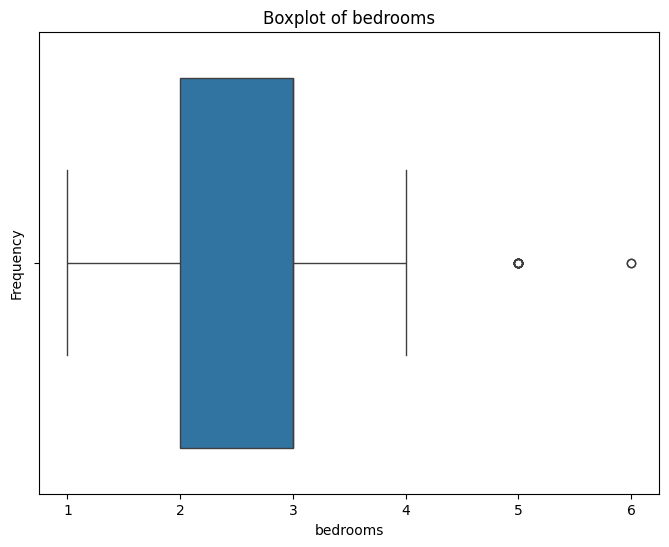

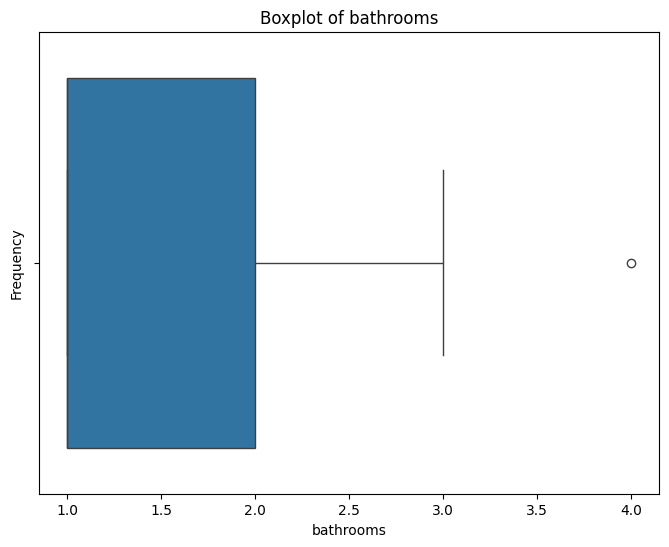

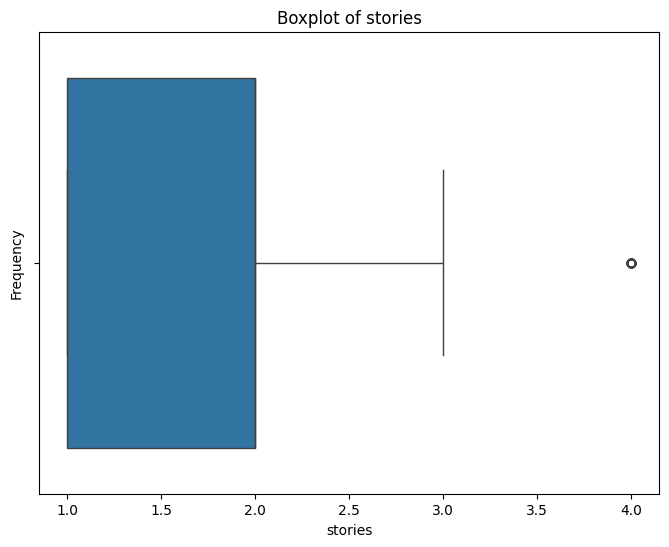

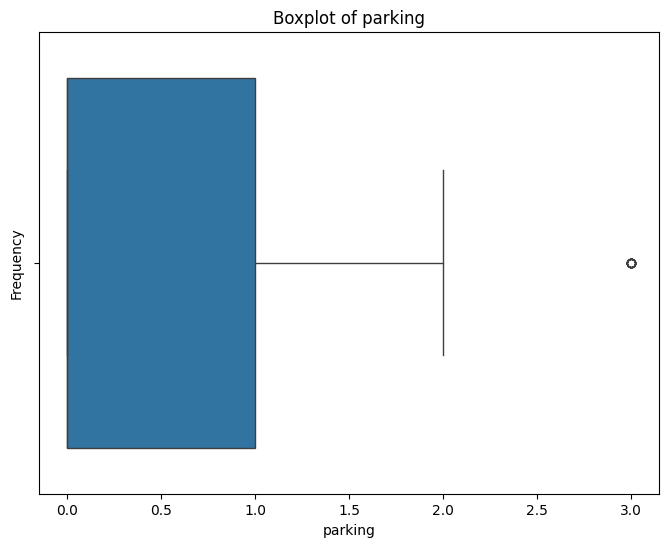

In [116]:
#boxplot for numerical colomns
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=data)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

From the boxplot
1. We can see few outliers present for price, are , bedrooms,bathrooms,stories, parking
2. Boxplot from area shows more outliers present for above approx 10000

In [117]:
#Fixing outliers using IQR method
def fix_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                         df[column].median(), df[column])
    return df

# Apply the function to columns with outliers
for col in ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']:
    data = fix_outliers(data, col)

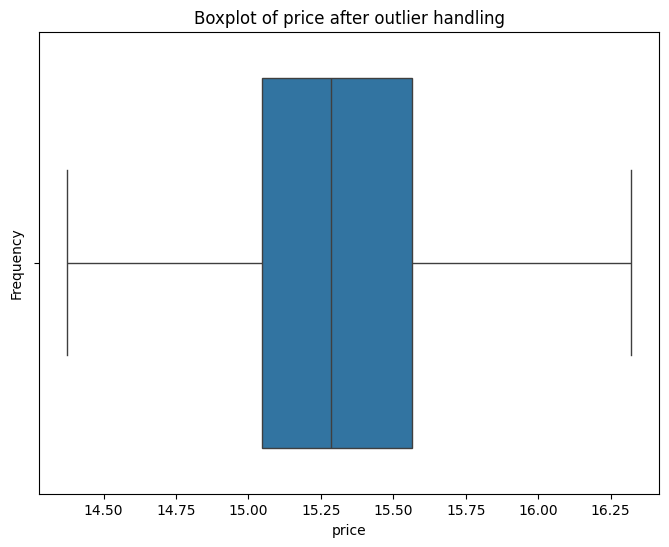

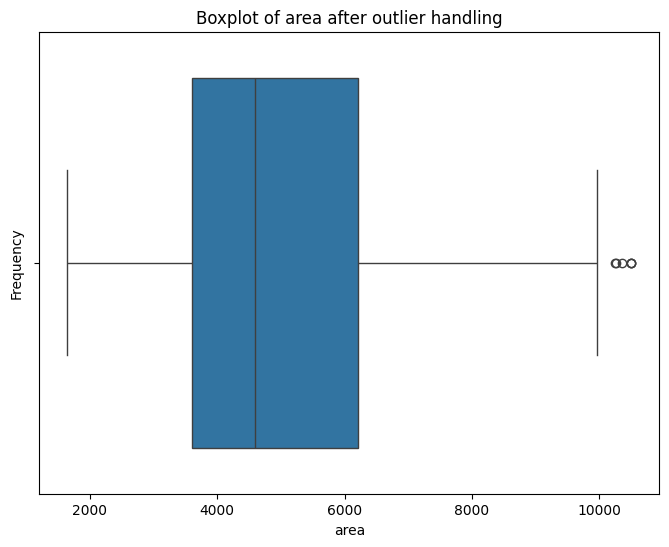

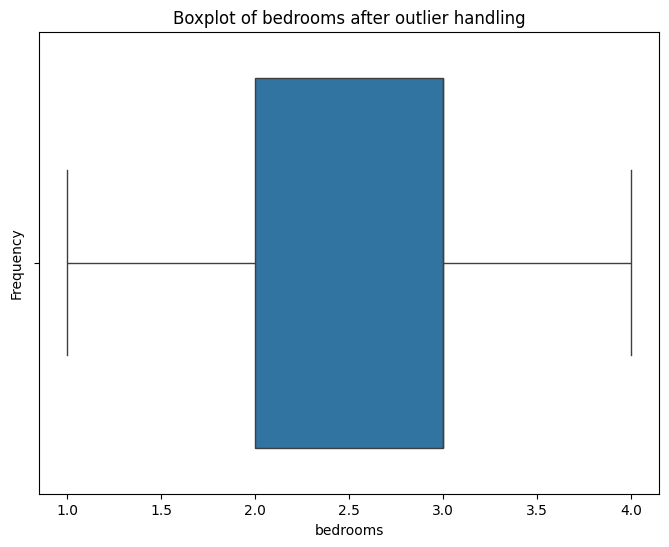

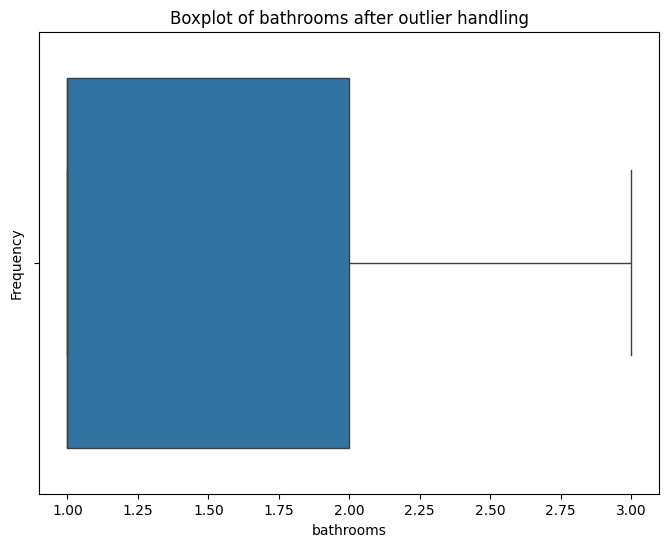

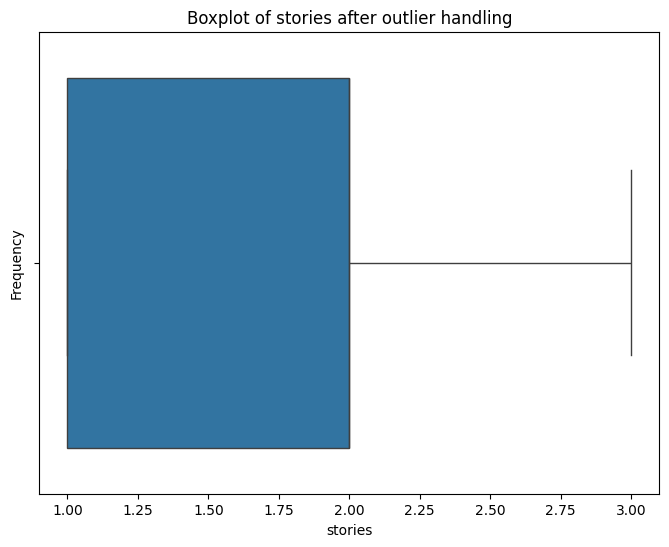

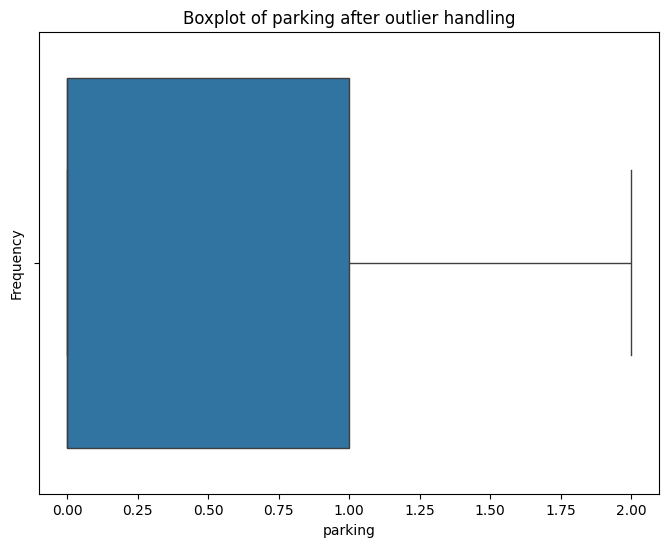

In [118]:
# Boxplot for specific columns after outlier treatment
for col in ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=data)
    plt.title(f'Boxplot of {col} after outlier handling')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [119]:
# Create a mapping for categorical features
mainroad_mapping = {'yes': 1, 'no': 0}
guestroom_mapping = {'yes': 1, 'no': 0}
basement_mapping = {'yes': 1, 'no': 0}
hotwaterheating_mapping = {'yes': 1, 'no': 0}
airconditioning_mapping = {'yes': 1, 'no': 0}
prefarea_mapping = {'yes': 1, 'no': 0}
furnishingstatus_mapping = {'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0}

# Apply the mapping to the DataFrame
data['mainroad'] = data['mainroad'].map(mainroad_mapping)
data['guestroom'] = data['guestroom'].map(guestroom_mapping)
data['basement'] = data['basement'].map(basement_mapping)
data['hotwaterheating'] = data['hotwaterheating'].map(hotwaterheating_mapping)
data['airconditioning'] = data['airconditioning'].map(airconditioning_mapping)
data['prefarea'] = data['prefarea'].map(prefarea_mapping)
data['furnishingstatus'] = data['furnishingstatus'].map(furnishingstatus_mapping)

# Display the updated DataFrame
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,15.283385,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,1,2
1,16.321037,8960.0,4.0,1.0,2.0,1,0,0,0,1,0.0,0,2
2,16.321037,9960.0,3.0,2.0,2.0,1,0,1,0,0,2.0,1,1
3,16.318175,7500.0,4.0,2.0,2.0,1,0,1,0,1,0.0,1,2
4,16.250001,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0,2


<Figure size 1200x800 with 0 Axes>

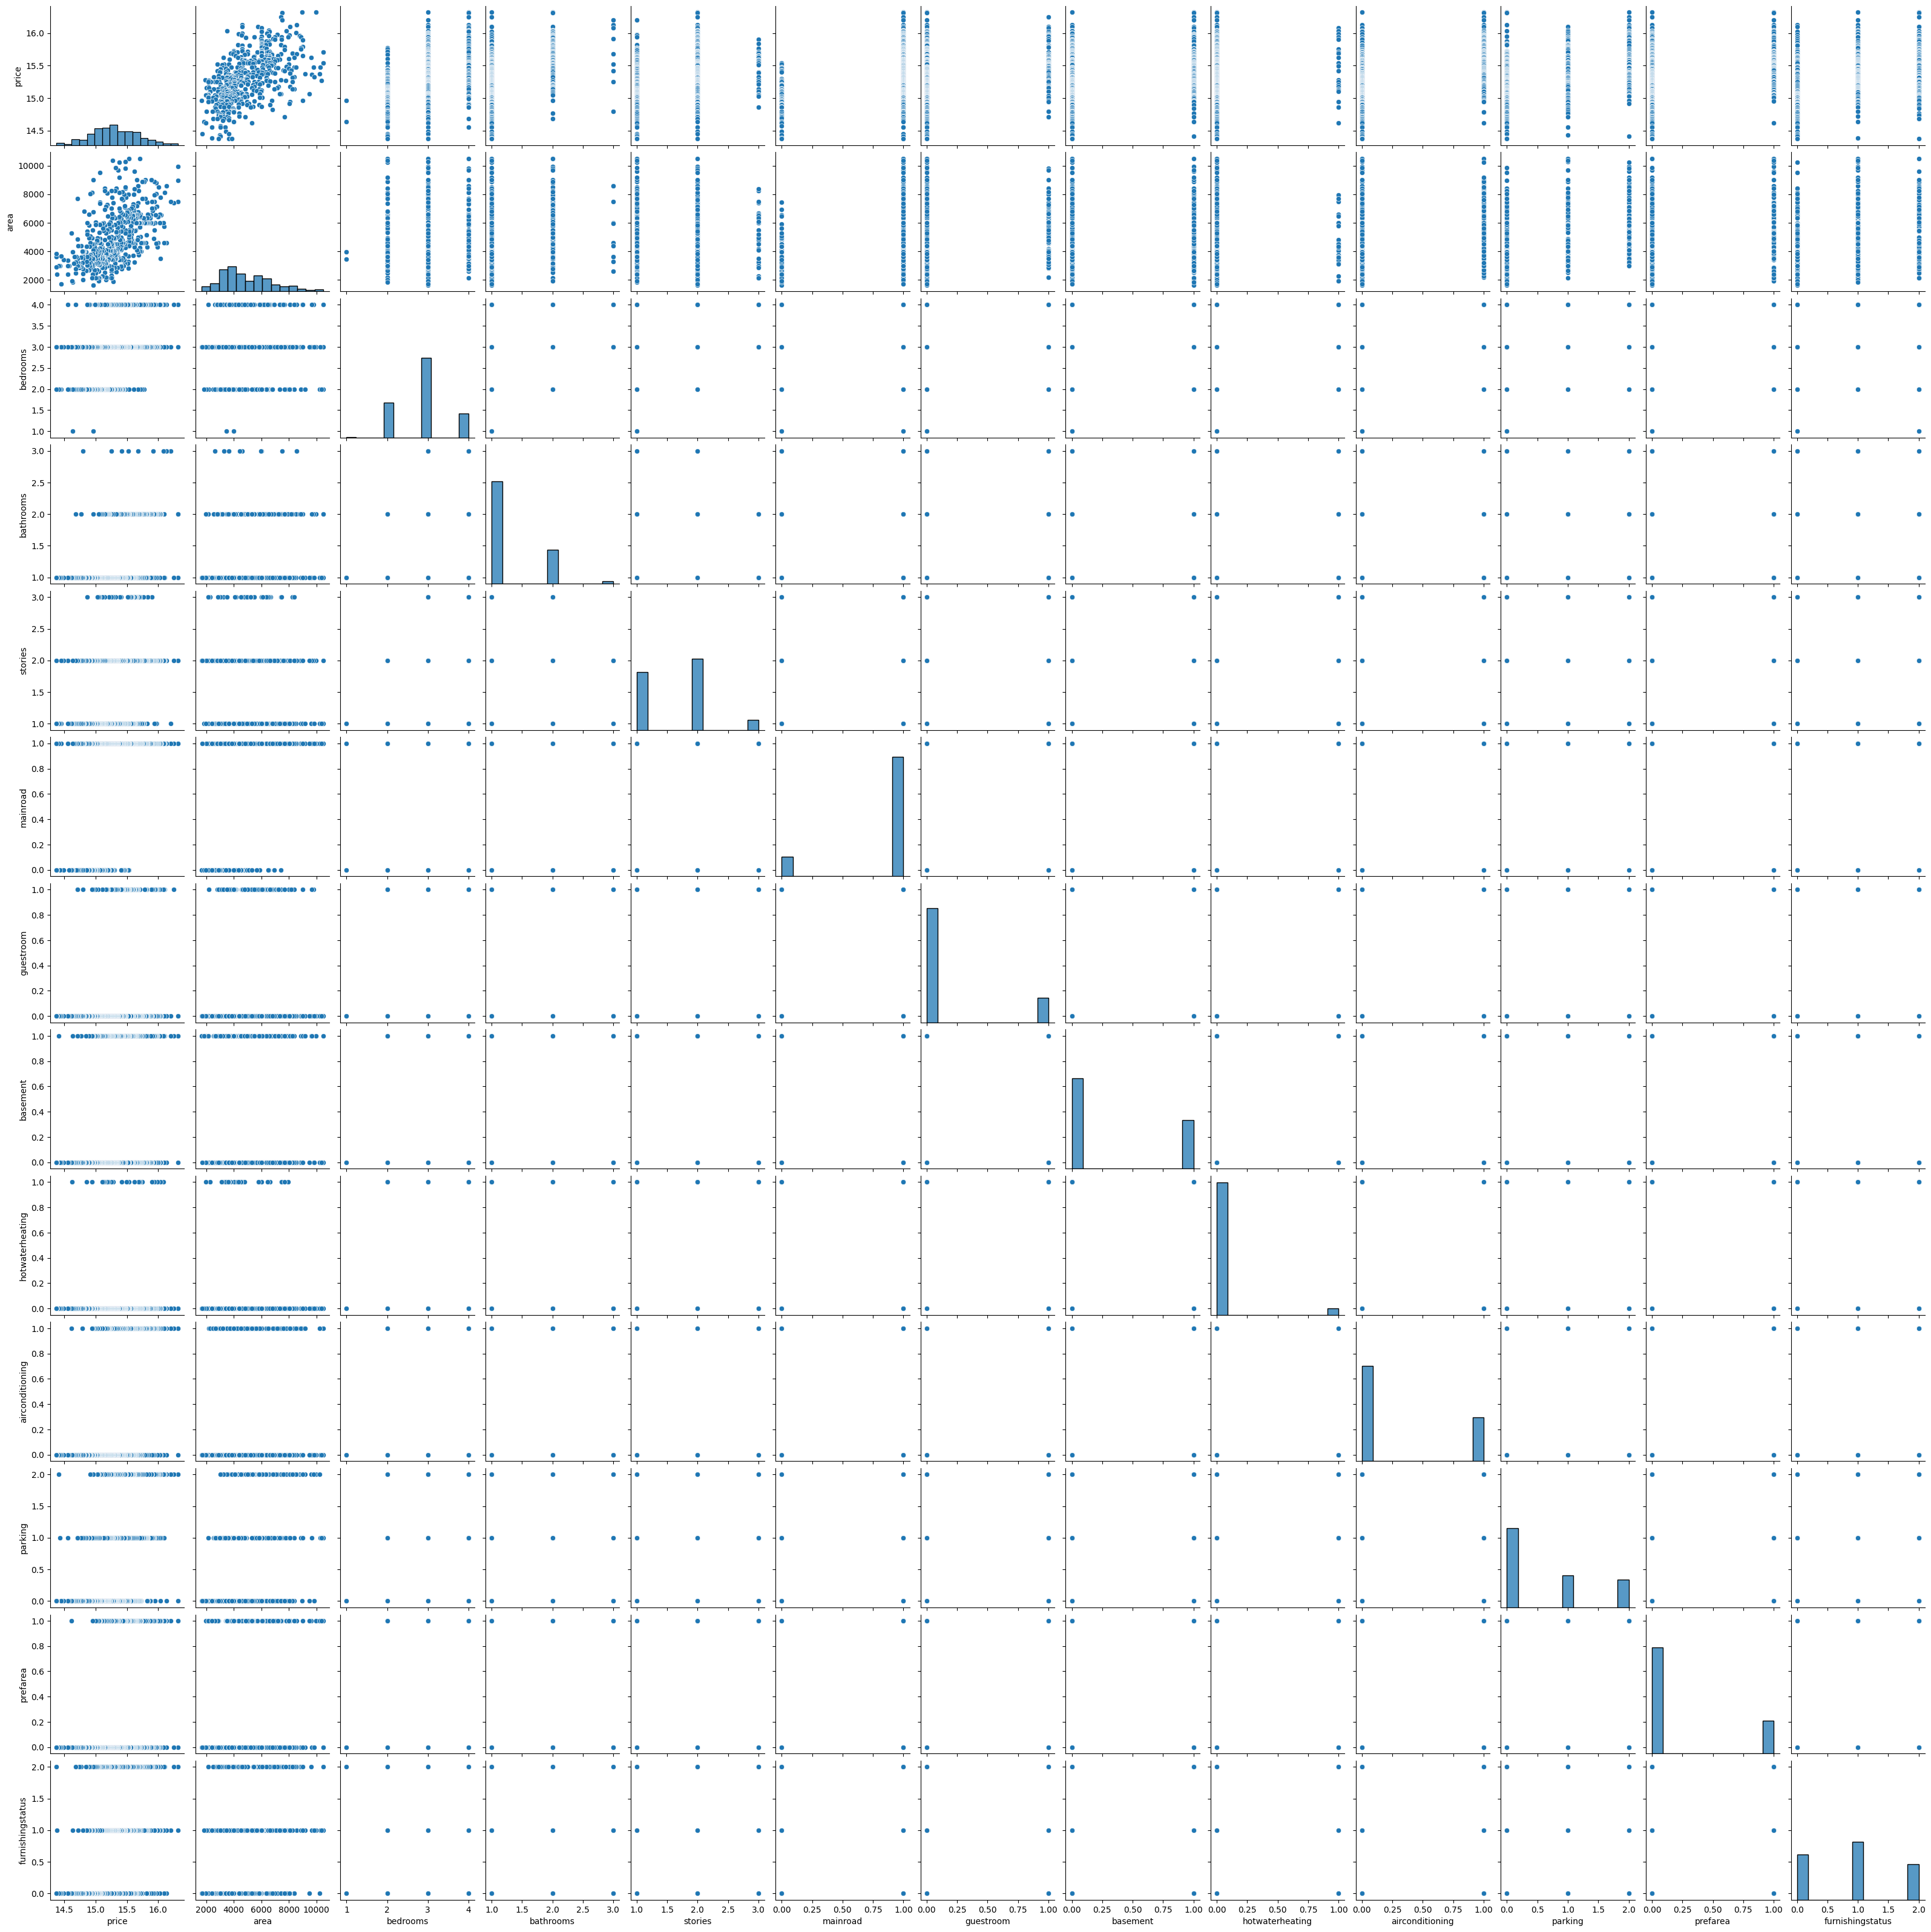

In [120]:
#Pairplot to understand relation between features
plt.figure(figsize=(12, 8))
sns.pairplot(data)
plt.show()

From the pairplot the relationship between price and
1. area has a linear upward trend with price which indicates a postive correlation as area increases price of houses also increase ,means Larger area leads to higher price
2. Price of houses with more bedrooms(2,3,4) is high,as beedrrom increase price also increase but there are some exceptions like price are low in few case even though more bedrooms
3. As the no.of bathrooms increases the price increases , but the effect is not as strong as area.
4. As the no.of stories increases the price increases but not much significant impact on price.
5. Houses on the mainroad has high price compared to the ones that are not in mainroad
6. Having a guestroom dose not have much effect on price
7. Homes with basements may have slightly more price.
8. Having a hotwaterhaeting does not have much effect on price
9. Houses with airconditioning have slightly higher prices
10. Houses with more parking spaces have high prices
11. houses in Preferred locations increase in price.
12. Fully furnished houses have higher prices compared to semi and non furnished houses

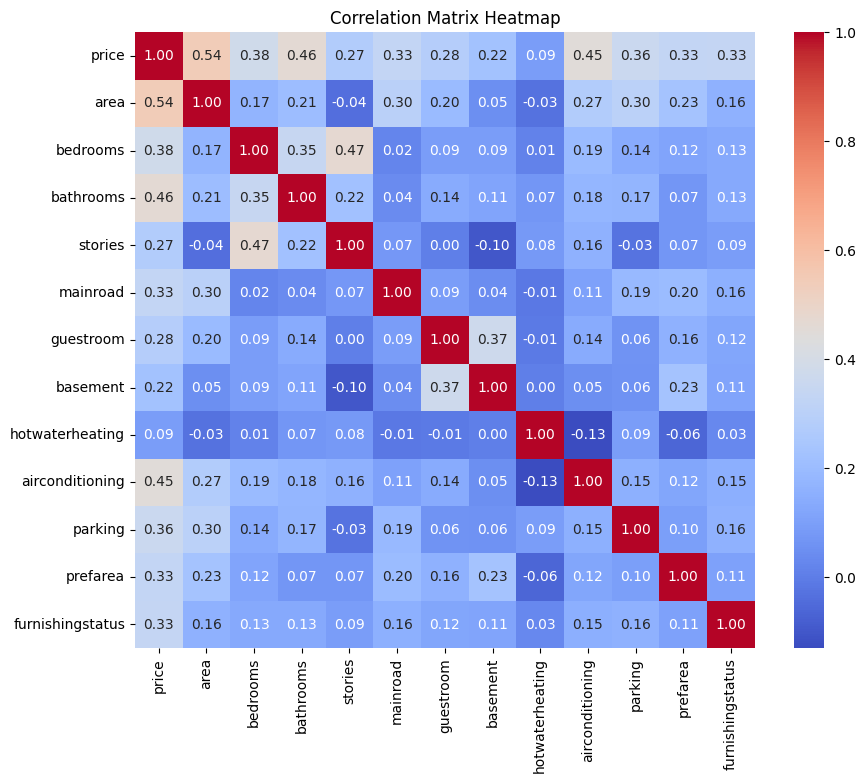

In [121]:
# Create the heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

1. Area (0.54): Strongest correlation with price. Larger houses tend to be more expensive.
2. Bathrooms (0.46): More bathrooms are associated with higher prices.
3. Air Conditioning (0.45): Homes with air conditioning tend to have higher prices.
4. Bedrooms (0.38): Moderate positive correlation; more bedrooms generally mean a higher price.
5. Parking (0.36): Houses with more parking space tend to be more expensive.
6. Main Road Access (0.33): Properties on the main road have slightly higher prices.
7. Furnishing Status (0.33): Furnished homes have a higher price.
8. Stories (0.27): More stories can slightly increase house prices.
9. Guestroom (0.28) & Preferred Area (0.33): Homes with these features are valued higher.
10. Basement (0.22) & Hot Water Heating (0.09): Weak correlation, meaning they have minimal impact on price.
So Area ,bathrooms, airconditioning,bedrooms, parking and mainroad are the important factors that determine the pricing of the houses.

In [122]:
# printing the data values in an array
data.values


array([[1.52833851e+01, 7.42000000e+03, 4.00000000e+00, ...,
        2.00000000e+00, 1.00000000e+00, 2.00000000e+00],
       [1.63210366e+01, 8.96000000e+03, 4.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.63210366e+01, 9.96000000e+03, 3.00000000e+00, ...,
        2.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [1.43751269e+01, 3.62000000e+03, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.43751269e+01, 2.91000000e+03, 3.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.43751269e+01, 3.85000000e+03, 3.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [123]:
#Scaling the data
array = data.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.47 0.65 1.   0.5  1.   1.   0.   0.   0.   1.   1.   1.   1.  ]
 [1.   0.83 1.   0.   0.5  1.   0.   0.   0.   1.   0.   0.   1.  ]
 [1.   0.94 0.67 0.5  0.5  1.   0.   1.   0.   0.   1.   1.   0.5 ]
 [1.   0.66 1.   0.5  0.5  1.   0.   1.   0.   1.   0.   1.   1.  ]
 [0.96 0.65 1.   0.   0.5  1.   1.   1.   0.   1.   1.   0.   1.  ]]


In [124]:
# Standardize data (0 mean, 1 stdev)
array = data.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-0.06  1.33  1.65  1.47  2.21  0.41 -0.47 -0.73 -0.22  1.47  1.73  1.8
   1.41]
 [ 2.75  2.17  1.65 -0.57  0.57  0.41 -0.47 -0.73 -0.22  1.47 -0.79 -0.55
   1.41]
 [ 2.75  2.72  0.13  1.47  0.57  0.41 -0.47  1.36 -0.22 -0.68  1.73  1.8
   0.09]
 [ 2.75  1.38  1.65  1.47  0.57  0.41 -0.47  1.36 -0.22  1.47 -0.79  1.8
   1.41]
 [ 2.56  1.33  1.65 -0.57  0.57  0.41  2.15  1.36 -0.22  1.47  1.73 -0.55
   1.41]]


So to conclude Area ,bathrooms, airconditioning,bedrooms, parking and mainroad are the factors that impact the pricing of the houses.